# Smart Evidence Pipeline (Toy Flows)

# 0. Setup

In [1]:
# set all environment variables
from util import show_image
%load_ext dotenv
%dotenv

cannot find .env file


In [2]:
# test an env variable to verify
!echo $AWS_DEFAULT_REGION

## 1. Corpus Ingestion

### 1.1 Data Stores

#### 1.1.1 Open Search

Open search data store component is purposed to store and retrieve JSON documents from a given index.

In [7]:
## create an index with a pre-specified mapping
## for instance for `Documents` for loading the raw corpus
from opensearch_utils import client as opensearch_client
from smart_evidence.data_models.document_store_schema import DOCUMENTS_MAPPING, INSIGHTS_MAPPING
import os

documents_index_name = "gcp-nb-documents-dev-v1"
insights_index_name = "gcp-nb-insights-dev-v1"

def create_index(index_name, mapping):
    response = None
    try:
        response = opensearch_client.indices.create(index_name, body=mapping)
    except:
        response = "index already exists"
    return response

# create index documents index
print("documents index creation status: ", create_index(index_name=documents_index_name, mapping=DOCUMENTS_MAPPING))

# create index insights index
print("insights index creation status: ", create_index(index_name=insights_index_name, mapping=INSIGHTS_MAPPING))

documents index creation status:  index already exists
insights index creation status:  index already exists


<br><br> 
Now let's load a toy corpus from `JSON Lines` format to open search documents index which is named `gcp-nb-documents-dev-v1`. <br>
We start by first creating the `YAML` config for this pipeline, which is illustrated below.
<br><br>

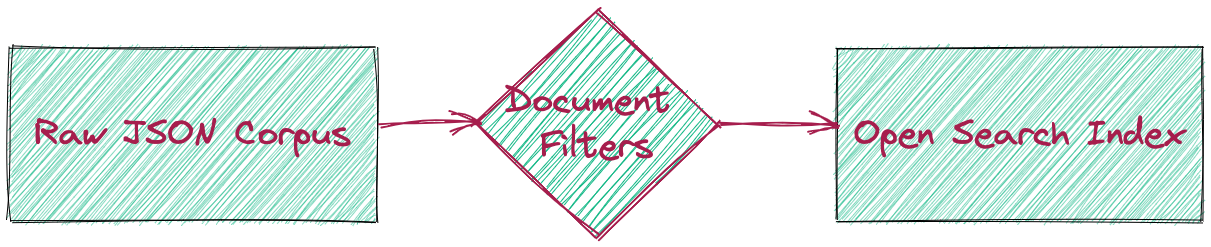

In [8]:
show_image('./images/document_ingestion_pipeline.png')

<br><br>
You can find the config for this flow under this path `examples/configs/ingest_documents.yaml`, there we first specify `JSONL` data store which very similar to Open search data store, however, reads and writes from/to JSON lines file. <br>
After creating the config, we are all set to ingest the corpus into Open search! :)
<br><br>

In [9]:
!python -m smart_evidence.flows.run_pipeline --config-path={os.getcwd()}/configs/extract_documents.yaml

/usr/local/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(
2023-01-19 11:10:43.018441: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Pipeline excecution has finished after processing 4 docs.


<br><br>
<strong> ** With the logs it can be seen that pipeline executed sucessfully.</strong>

## 2. Insight Extraction and Embeddings

With the above setup it is as easy as changing the config to run the pipeline to perform something completely different. Here, in this pipeline we will split the long documents into paragraphs and then embed those paragraphs with sentence transformer. <br>
This all will be done by only changing the pipeline configuration. Here, we would create another configuration file under the path `examples/configs/extract_embed_insights.yaml`, and is illustrated below.

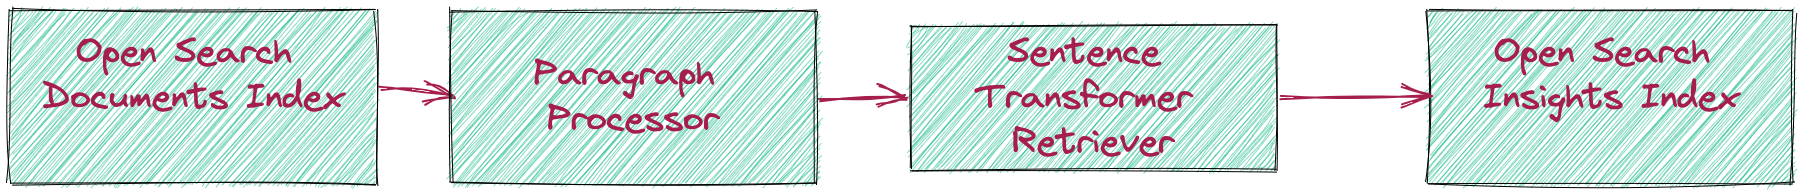

In [10]:
show_image('./images/insights_extraction.png', height=1600, width=1200)

Let's run the flow for insights this time. Notice, that I have changed the index name in config as well to index insights as destination index.
<br><br>

In [11]:
!python -m smart_evidence.flows.run_pipeline --config-path={os.getcwd()}/configs/extract_insights.yaml

/usr/local/anaconda3/lib/python3.8/site-packages/ray/autoscaler/_private/cli_logger.py:57: FutureWarning: Not all Ray CLI dependencies were found. In Ray 1.4+, the Ray CLI, autoscaler, and dashboard will only be usable via `pip install 'ray[default]'`. Please update your install command.
  warnings.warn(
2023-01-19 11:11:21.354208: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
Batches: 100%|████████████████████████████████████| 1/1 [00:00<00:00,  1.71it/s]
Pipeline excecution has finished after processing 4 docs.


<br><br><br>
<strong>** And again the pipeline ran succesfully, showing the number of paragraphs processed by it.</strong>